# Bank Marketing Success Classification

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

The goal of this project is to run classification algorithms to identify whether a customer will subscribe to a term deposit. The ```bank-names.txt``` file has a description of all the independent variables as well as the dependent variable

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

In [2]:
# Check path name
import os
notebook_path = os.path.abspath("student.ipynb").replace('\\','/')
print(notebook_path)

C:/Users/edmun_000/Documents/Flatiron/final_project/hsbc_dse_project/notebooks/student.ipynb


In [3]:
df = pd.read_csv("C:/Users/edmun_000/Documents/Flatiron/final_project/hsbc_dse_project/data/bank-full.csv", delimiter=";")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [26]:
df['pdays'].value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

In [6]:
df['y'].value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: y, dtype: float64

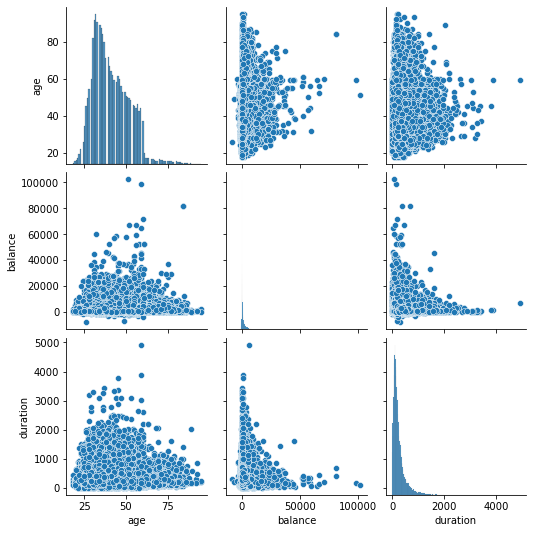

In [9]:
continuous = ['age', 'balance', 'duration']
import seaborn as sns
sns.pairplot(df[continuous]);

In [16]:
cat_cols = [col for col in df.columns[:-1] if df[col].dtype == "object"]
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [17]:
categorical = ['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'previous']

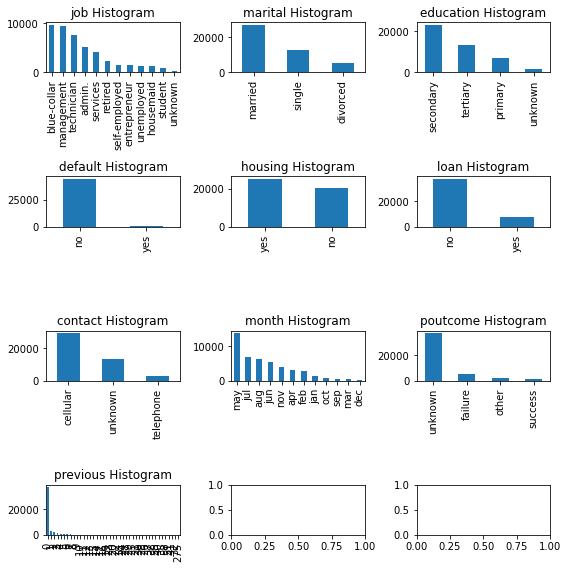

In [20]:
fig, axs = plt.subplots(4, 3, figsize=(8, 8))

for col, ax in tqdm(zip(categorical, np.ravel(axs)), total=len(categorical)):
    df[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f"{col} Histogram")
    
fig.tight_layout()
plt.show()